In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import loanDFWrangle

# Gather and overview of the dataset
I open the csv file saved at the end of the wrangling notebook

In [2]:
# Read propser loan cleaned DataFrame from the created csv file from the data_wrangling.ipynb notebook
df_loan_data = pd.read_csv('prosperLoanDataCleaned.csv')

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset.

In [3]:
df_loan_data.head()

,LoanStatus,BorrowerRate,Occupation,IsBorrowerHomeowner,DelinquenciesLast7Years,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Recommendations,CreditScoreRangeAvg,ListingCategory
0,Completed,0.1580,Other,True,4,3083.333333,9425,2007-09-12,0,649.5,Not Available
1,Current,0.0920,Professional,False,0,6125.000000,10000,2014-03-03,0,689.5,Home Improvement
2,Completed,0.2750,Other,False,0,2083.333333,3001,2007-01-17,0,489.5,Not Available
3,Current,0.0974,Skilled Labor,True,14,2875.000000,10000,2012-11-01,0,809.5,Motorcycle
4,Current,0.2085,Executive,True,0,9583.333333,15000,2013-09-20,0,689.5,Home Improvement


In [4]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110345 entries, 0 to 110344
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanStatus               110345 non-null  object 
 1   BorrowerRate             110345 non-null  float64
 2   Occupation               110345 non-null  object 
 3   IsBorrowerHomeowner      110345 non-null  bool   
 4   DelinquenciesLast7Years  110345 non-null  int64  
 5   StatedMonthlyIncome      110345 non-null  float64
 6   LoanOriginalAmount       110345 non-null  int64  
 7   LoanOriginationDate      110345 non-null  object 
 8   Recommendations          110345 non-null  int64  
 9   CreditScoreRangeAvg      110345 non-null  float64
 10  ListingCategory          110345 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 8.5+ MB


Since saving a Pandas Dataframe in a csv file and re opening this same file into another Dataframe loses the categories, I have to retransform some variable into categories.

In [5]:
loanDFWrangle.categorizeVariables(df_loan_data)
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110345 entries, 0 to 110344
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   LoanStatus               110345 non-null  category      
 1   BorrowerRate             110345 non-null  float64       
 2   Occupation               110345 non-null  category      
 3   IsBorrowerHomeowner      110345 non-null  bool          
 4   DelinquenciesLast7Years  110345 non-null  int64         
 5   StatedMonthlyIncome      110345 non-null  float64       
 6   LoanOriginalAmount       110345 non-null  int64         
 7   LoanOriginationDate      110345 non-null  datetime64[ns]
 8   Recommendations          110345 non-null  int64         
 9   CreditScoreRangeAvg      110345 non-null  float64       
 10  ListingCategory          110345 non-null  category      
dtypes: bool(1), category(3), datetime64[ns](1), float64(3), int64(3)
memory usage:

In [6]:
df_loan_data.describe()

,BorrowerRate,DelinquenciesLast7Years,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,CreditScoreRangeAvg
count,110345.000000,110345.000000,1.103450e+05,110345.000000,110345.000000,110345.000000
mean,0.193052,4.089990,5.640128e+03,8420.685659,0.049563,696.421927
std,0.075020,10.053409,7.567642e+03,6268.182655,0.337568,64.642315
min,0.000000,0.000000,0.000000e+00,1000.000000,0.000000,9.500000
25%,0.134000,0.000000,3.250000e+03,4000.000000,0.000000,669.500000
50%,0.184000,0.000000,4.666667e+03,6500.000000,0.000000,689.500000
75%,0.251100,3.000000,6.833333e+03,12000.000000,0.000000,729.500000
max,0.360000,99.000000,1.750003e+06,35000.000000,39.000000,889.500000


# Goal of this exploration
In this project, I will try to understand and put into light what are the degrees of importance of the different variable in this data set that could influence the Loan status and the borrower rate.

To do so, I will start by analyzing the variables independantly from the other (univariate exploration) and then I will move toward the analysis of the relation between the variable (bivariate and multivariate exploration).

# Univariate exploration
In this section, I will explore the main variables independantly from the other to determine their distribution.
## Loan Status

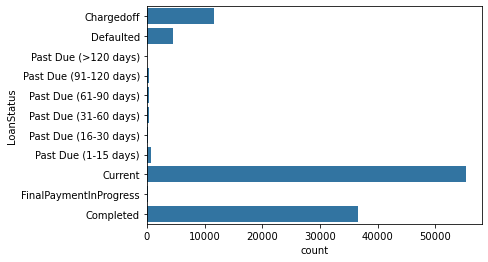

In [7]:
# Count plot of loan statuses
base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_data, y='LoanStatus', color=base_color);

In this count plot, the statuses are ordered by severity from worst (Charged off) to best (Completed).  
We can notice that we are dealing mostly with completed or currently running loans. The most frequents statuses are then the loans where the borrowers completely stopped paying (Charged off or Defaulted)
In order to have a better idea of the other statuses counts, let's limit the x axis to the count of Defaulted.

In [8]:
df_loan_data.LoanStatus.value_counts()

Current                   55272
Completed                 36620
Chargedoff                11701
Defaulted                  4496
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

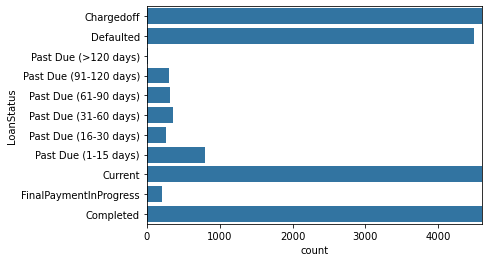

In [9]:
# Count plot of loan statuses with limited x axis to focus on the less frequent statuses
sb.countplot(data=df_loan_data, y='LoanStatus', color=base_color);
plt.xlim(None, df_loan_data.LoanStatus.value_counts().Defaulted + 100);

We can notice that all the other statuses have a really low counts w.r.t. to the above mentionned hight count statuses (up to 1 for 100).  
Inside the past due statuses, almost all have the same counts except for the first 15 days or when the past due is higher than 120 days.  

We can note there that it may be worth grouping the statuses into groups (e.g. running and completed, past due and payment stopped) to perform the bi/multivariate explarotion.

### Loan status simplification
After the univariate exploration of the Loan Status in the first part, we concluded that it may be a good idea to simplify the Loan statuses by reducing their number without losing much information.  
Here is how I will simplify the statuses:
- PaymentsStopped containing the original statuses Defaulted and Chargedoff
- PastDueSevere containing the original statuses Past Due from 61 to >120 days
- PastDueLight containing the original statuses Past Due from 1 to 60 days
- Ongoing containing the original statuses Current and FinalPaymentInProgress
- Completed which is the same status as in the original variable

In [10]:
# Dictionnary for the status simplification
#loan_status_simplification = {
#    'PaymentsStopped': ['Defaulted', 'Chargedoff'],
#    'PastDueSevere': ['Past Due \(61-90 days\)', 'Past Due \(91-120 days\)', 'Past Due \(>120 days\)'],
#    'PastDueLight': ['Past Due \(1-15 days\)', 'Past Due \(16-30 days\)', 'Past Due \(31-60 days\)'],
#    'Ongoing': ['Current', 'FinalPaymentInProgress'],
#    'Completed': ['Completed'],
#}
loan_status_simplification = {
    'PaymentsStopped': ['Defaulted', 'Chargedoff'],
    'PastDue': ['Past Due.*'],
    'Ongoing': ['Current', 'FinalPaymentInProgress'],
    'Completed': ['Completed'],
}

# Copy LoanStatus into LoanStatusSimplified
df_loan_data['LoanStatusSimplified'] = df_loan_data.LoanStatus.astype(str)
for simpl_status, status_list in loan_status_simplification.items():
    for status in status_list:
        # print('replacing \'{}\' with \'{}\''.format(status, simpl_status))
        # And replace all the entries using the simplification dictionnary
        df_loan_data.LoanStatusSimplified = df_loan_data.LoanStatusSimplified.str.replace(status, simpl_status)

df_loan_data.LoanStatusSimplified.value_counts()

Ongoing            55475
Completed          36620
PaymentsStopped    16197
PastDue             2053
Name: LoanStatusSimplified, dtype: int64

In [11]:
# Transform LoanStatusSimplified into an ordered category
loan_status_simplified_list = list(loan_status_simplification.keys())
loan_status_simplified_class = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status_simplified_list)
df_loan_data.LoanStatusSimplified = df_loan_data.LoanStatusSimplified.astype(loan_status_simplified_class);
df_loan_data.LoanStatusSimplified

0         Completed
1           Ongoing
2         Completed
3           Ongoing
4           Ongoing
            ...    
110340      Ongoing
110341      Ongoing
110342      Ongoing
110343    Completed
110344      Ongoing
Name: LoanStatusSimplified, Length: 110345, dtype: category
Categories (4, object): ['PaymentsStopped' < 'PastDue' < 'Ongoing' < 'Completed']

In [12]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110345 entries, 0 to 110344
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   LoanStatus               110345 non-null  category      
 1   BorrowerRate             110345 non-null  float64       
 2   Occupation               110345 non-null  category      
 3   IsBorrowerHomeowner      110345 non-null  bool          
 4   DelinquenciesLast7Years  110345 non-null  int64         
 5   StatedMonthlyIncome      110345 non-null  float64       
 6   LoanOriginalAmount       110345 non-null  int64         
 7   LoanOriginationDate      110345 non-null  datetime64[ns]
 8   Recommendations          110345 non-null  int64         
 9   CreditScoreRangeAvg      110345 non-null  float64       
 10  ListingCategory          110345 non-null  category      
 11  LoanStatusSimplified     110345 non-null  category      
dtypes: bool(1), cate

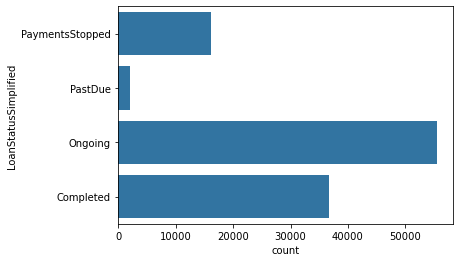

In [13]:
# Count plot of simplified loan statuses
sb.countplot(data=df_loan_data, y='LoanStatusSimplified', color=base_color);

We can notice that most of the Loan Status are either ongoing or completed.

## Borrower Rate

In [14]:
df_loan_data.BorrowerRate.describe()

count    110345.000000
mean          0.193052
std           0.075020
min           0.000000
25%           0.134000
50%           0.184000
75%           0.251100
max           0.360000
Name: BorrowerRate, dtype: float64

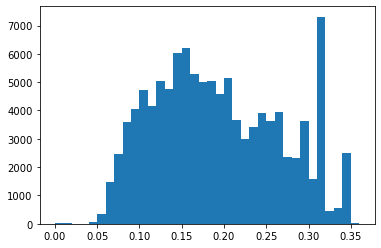

In [15]:
# Histogram of the borrower rate
bin_step = 0.01
bins = np.arange(df_loan_data.BorrowerRate.min(), df_loan_data.BorrowerRate.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='BorrowerRate', color=base_color, bins=bins);

We can notice that the rate distribution is normal and quite symetric, with a slight skew to the right and almost unimodal, except for 2 pikes between 0.3 and 0.35.  
The rates are evolving from 0.05 to 0.35 with a median at 0.18.

## Borrower Occupation

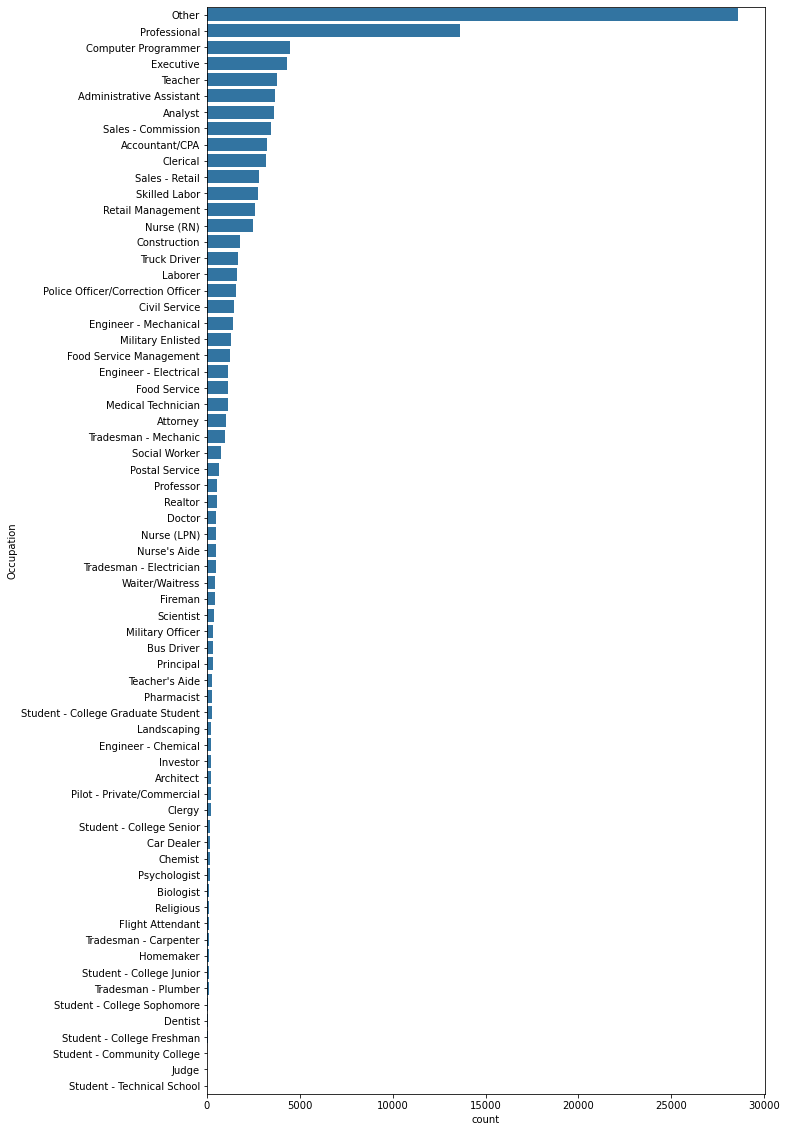

In [16]:
# Count plot of borrower occupation
occupation_order = df_loan_data.Occupation.value_counts().index

plt.figure(figsize=(10, 20))
sb.countplot(data=df_loan_data, y='Occupation', color=base_color, order=occupation_order);

We can notice that the 2 Occupations with highest counts are Other and Professionnal, which don't bring much information about the borrower.  
Let's limit the x axis to focus on the other occupations.

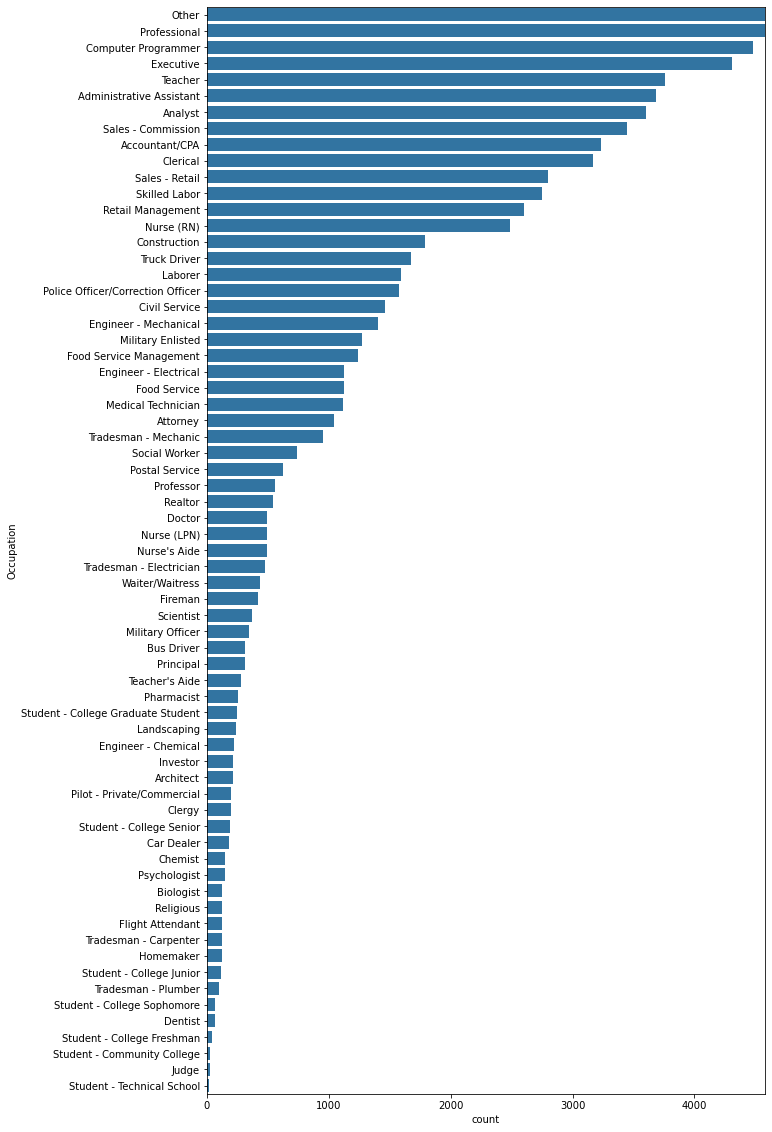

In [17]:
# Count plot of borrower occupation with focus on the lower frequencies
plt.figure(figsize=(10, 20))
sb.countplot(data=df_loan_data, y='Occupation', color=base_color, order=occupation_order);
plt.xlim(None, df_loan_data.Occupation.value_counts()['Computer Programmer'] + 100);

There are a lot of different occupation that will make the multivariate exploration later overloaded.  
We can take note here that it may be worth regrouping the occupations later in the exploration and also not use the Other or Professional occupations that don't bring much information about the borrower.

## Is Borrower Homeowner

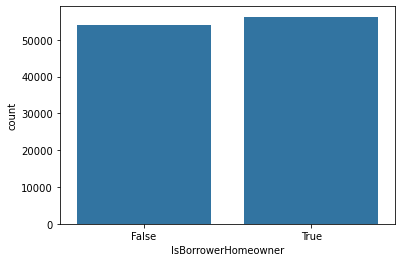

In [18]:
# Count plot of borrower home ownership status
sb.countplot(data=df_loan_data, x='IsBorrowerHomeowner', color=base_color);

This count plot tells us that there are as many borrowers who own a house a borrower who don't.

## Borrower Delinquencies Last 7 Years

In [19]:
df_loan_data.DelinquenciesLast7Years.describe()

count    110345.000000
mean          4.089990
std          10.053409
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          99.000000
Name: DelinquenciesLast7Years, dtype: float64

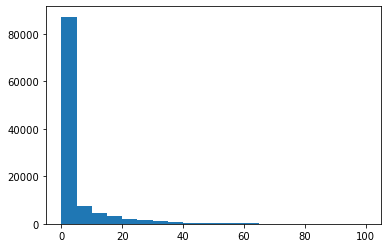

In [20]:
# histogram of borrower deliquencies in the last 7 years
bin_step = 5
bins = np.arange(df_loan_data.DelinquenciesLast7Years.min(), df_loan_data.DelinquenciesLast7Years.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='DelinquenciesLast7Years', color=base_color, bins=bins);

We can observe that most of the borrowers don't have any delinquencies during the last 7 years. In fact at least 50% of them don't have any deliquency at all and 75% of them had 2 or less deliquencies during the last 7 years.

Let's check if we only observe the borrowers with at least one deliquencies.

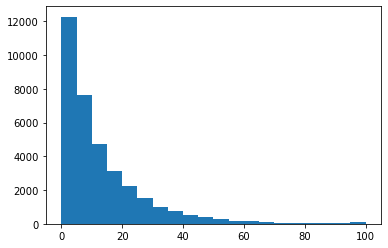

In [21]:
# histogram of borrower deliquencies in the last 7 years for the borrowers who had at least one deliquency
bin_step = 5
bins = np.arange(df_loan_data.DelinquenciesLast7Years.min(), df_loan_data.DelinquenciesLast7Years.max() + bin_step, bin_step);
plt.hist(data=df_loan_data[df_loan_data.DelinquenciesLast7Years > 0], x='DelinquenciesLast7Years', color=base_color, bins=bins);

We can see that the histogram is still very skewed to the right with the number of deliquencies going from 0 to 100.

## Borrower Stated Monthly Income

In [22]:
df_loan_data.StatedMonthlyIncome.describe()

count    1.103450e+05
mean     5.640128e+03
std      7.567642e+03
min      0.000000e+00
25%      3.250000e+03
50%      4.666667e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

It seems that some entries may not fit with the description of the data. Some of the borrowers stated some monthly income higher than 100000$ which seem yearly incomes. Let's analyze this a bit deeper.

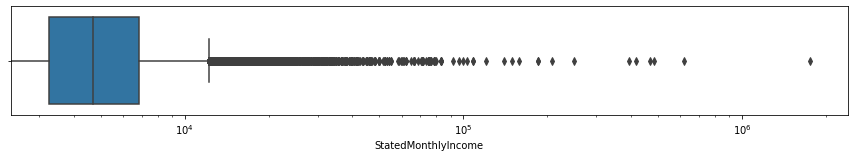

In [23]:
plt.figure(figsize=[15, 2]);
sb.boxplot(data=df_loan_data, x='StatedMonthlyIncome', color=base_color);
plt.xscale('log');

The box plot from the stated monthly income shows that we have a lot of outliers in the high incomes.  
Even if a monthly income of +100k$ is not impossible, this is quite rare for those kind of person to contract a loan. There is even a monthly income higher than 1 million. The reason can be simply that the people stated their yearly income instead of their montly income.

I will first remove the monthly incomes higher than 1 million from the data set. Then, I will transform every monthly income higher than 10k$ by dividing it by 12 to change it from yearly to monthly income.

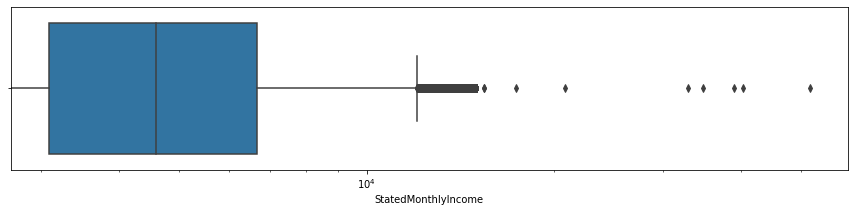

In [24]:
# Keep only the entries with stated monthly income lower than 1 million
df_loan_data = df_loan_data[df_loan_data.StatedMonthlyIncome < 1000000]

# Divide by 12 each monthly income higher than 15k$ to transform from 
df_loan_data.StatedMonthlyIncome = df_loan_data.StatedMonthlyIncome.apply(lambda x: x/12 if x > 15000 else x)
plt.figure(figsize=[15, 3]);
sb.boxplot(data=df_loan_data, x='StatedMonthlyIncome', color=base_color);
plt.xscale('log');

In [25]:
df_loan_data.StatedMonthlyIncome.describe()

count    110344.000000
mean       5097.959270
std        2840.748678
min           0.000000
25%        3083.333333
50%        4583.333333
75%        6666.666667
max       51545.652778
Name: StatedMonthlyIncome, dtype: float64

We have now less outliers in the monthly stated income.

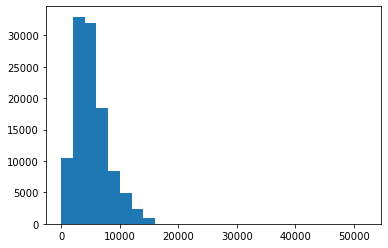

In [26]:
# histogram of borrower stated monthly income
bin_step = 2000
bins = np.arange(df_loan_data.StatedMonthlyIncome.min(), df_loan_data.StatedMonthlyIncome.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='StatedMonthlyIncome', color=base_color, bins=bins);

As we can see, the borrower stated monthly income is completely skewed on the right. Let's try to apply a log scale on the x axis.

In [27]:
np.log10(df_loan_data.StatedMonthlyIncome.describe())

/home/simon/anaconda3/envs/data-analysis/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.042749
mean     3.707396
std      3.453433
min          -inf
25%      3.489020
50%      3.661181
75%      3.823909
max      4.712192
Name: StatedMonthlyIncome, dtype: float64

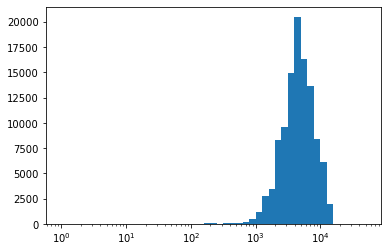

In [28]:
# Histogram of borrower stated monthly income with log scale
# Let's use the log10(1)=0, with 1 the smallest monthly income value higher than 0 as min value for our log scale
bin_step = 0.1
bins = 10 ** np.arange(0, 4.7 + bin_step, bin_step)
plt.hist(data=df_loan_data, x='StatedMonthlyIncome', color=base_color, bins=bins);
plt.xscale('log');

As we can see, on a log scale, the stated monthly income is normally distributed, uninodal and symetrical around ~5000\$.

Let's zoom in by removing the 5\% at each extremities of the histogram.

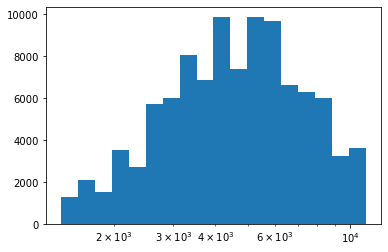

In [29]:
# Histogram of borrower stated monthly income with log scale without 5% outliers
bin_step = 0.05
min_outlier = np.log10(df_loan_data.StatedMonthlyIncome.describe([0.05, 0.5, 0.95]))['5%']
max_outlier = np.log10(df_loan_data.StatedMonthlyIncome.describe([0.05, 0.5, 0.95]))['95%']
bins = 10 ** np.arange(min_outlier, max_outlier + bin_step, bin_step)
plt.hist(data=df_loan_data, x='StatedMonthlyIncome', color=base_color, bins=bins);
plt.xscale('log');

The diagramm without the outlier confirm the normal distribution unimodal and symetric centered around ~5000.

### Loan Original Amount

In [30]:
df_loan_data.LoanOriginalAmount.describe()

count    110344.000000
mean       8420.725721
std        6268.196931
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

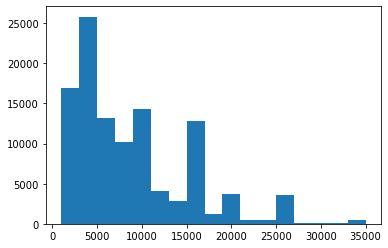

In [31]:
# histogram of loan original amount
bin_step = 2000
bins = np.arange(df_loan_data.LoanOriginalAmount.min(), df_loan_data.LoanOriginalAmount.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='LoanOriginalAmount', color=base_color, bins=bins);

As we can see, the loan original amount is completely skewed on the right. Let's try to apply a log scale on the x axis.

In [32]:
np.log10(df_loan_data.LoanOriginalAmount.describe())

count    5.042749
mean     3.925350
std      3.797143
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

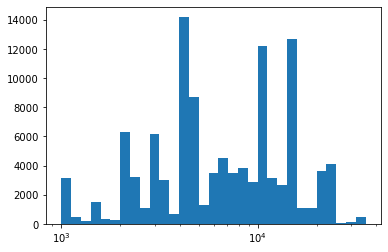

In [33]:
# Histogram of loan original amount with log scale
bin_step = 0.05
bins = 10 ** np.arange(3.0, 4.54 + bin_step, bin_step)
plt.hist(data=df_loan_data, x='LoanOriginalAmount', color=base_color, bins=bins);
plt.xscale('log');

The log scale distribution isn't normal and it just confirms that the loan original amount has peaks around 5000, 10000 and 15000 \$.

## Borrower Recommendations

In [34]:
df_loan_data.Recommendations.describe()

count    110344.000000
mean          0.049563
std           0.337570
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: Recommendations, dtype: float64

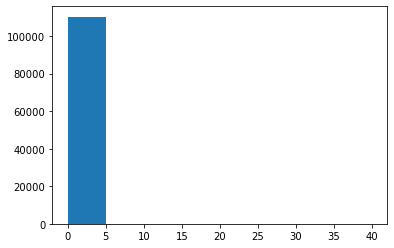

In [35]:
# histogram of borrower recommandation
bin_step = 5
bins = np.arange(df_loan_data.Recommendations.min(), df_loan_data.Recommendations.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='Recommendations', color=base_color, bins=bins);

From the histogram and the describtion, we can notice that most of the borrowers don't have any recommandation.  
Let's re draw the histogram with only the people who have at least one recommandation

In [36]:
df_loan_data[df_loan_data.Recommendations > 0].Recommendations.describe()

count    4256.000000
mean        1.285009
std         1.169258
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        39.000000
Name: Recommendations, dtype: float64

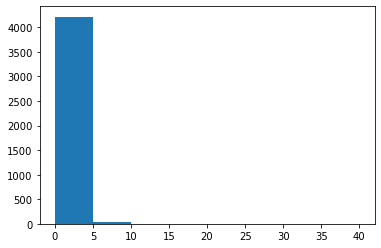

In [37]:
# histogram of borrower having at least one recommandation
bin_step = 5
bins = np.arange(df_loan_data.Recommendations.min(), df_loan_data.Recommendations.max() + bin_step, bin_step);
plt.hist(data=df_loan_data[df_loan_data.Recommendations > 0], x='Recommendations', color=base_color, bins=bins);

We can see again that most of the people having at least one recommandation, have just one recommandation.

Later in the multivariate exploration, it may be worth to transform this variable into a boolean one (have at least a recommandation or don't have at all)

## Borrower Credit Score Range Average

In [38]:
df_loan_data.CreditScoreRangeAvg.describe()

count    110344.000000
mean        696.421446
std          64.642411
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScoreRangeAvg, dtype: float64

In [39]:
df_loan_data.CreditScoreRangeAvg.value_counts()

689.5    16156
669.5    15903
709.5    15188
729.5    12723
649.5    11795
749.5     9151
769.5     6525
789.5     4574
629.5     4043
609.5     3455
809.5     2606
529.5     1495
829.5     1387
549.5     1300
569.5     1260
589.5     1062
849.5      562
509.5      414
489.5      263
869.5      206
469.5      112
9.5        101
449.5       30
889.5       27
429.5        5
369.5        1
Name: CreditScoreRangeAvg, dtype: int64

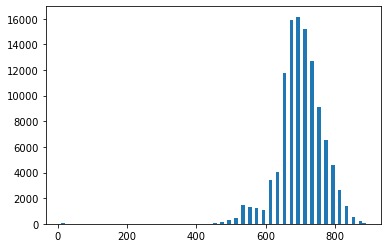

In [40]:
# histogram of borrower credit score range average
bin_step = 10
bins = np.arange(df_loan_data.CreditScoreRangeAvg.min(), df_loan_data.CreditScoreRangeAvg.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='CreditScoreRangeAvg', color=base_color, bins=bins);

We can notice that the credit score range average takes only certain unique values between 529 and 889.  
The histogram shows us that the score is normally distributed, unimodal and symetric around 700.

## Loan Listing Category

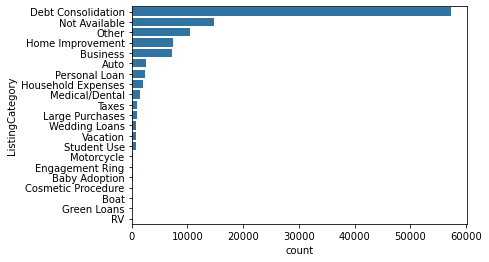

In [41]:
# Count plot of loan listing category
list_cat_order = df_loan_data.ListingCategory.value_counts().index

sb.countplot(data=df_loan_data, y='ListingCategory', color=base_color, order=list_cat_order);

We can observe that the main reason to borrow money is to consolidate a debt.  
The 2 following reasons don't bring much information.

Let's focus on the rest of the category by limiting the x axis.

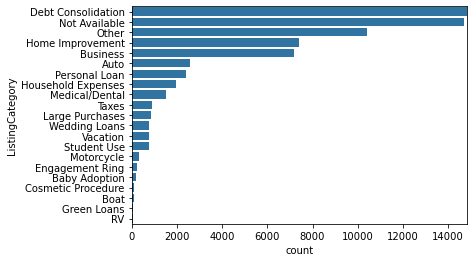

In [42]:
# Count plot of loan listing category focusing on the category with lower count
list_cat_order = df_loan_data.ListingCategory.value_counts().index

sb.countplot(data=df_loan_data, y='ListingCategory', color=base_color, order=list_cat_order);
plt.xlim(None, df_loan_data.ListingCategory.value_counts()['Not Available'] + 100);

We can notice that the 2 main reasons to borrow money, after the debt consolidation is to improve its home or create/support a business.

# Bivariate and Multivariate exploration
## Analysis of the influence of some variables on the Loan Status
In this section, I will try to find the main variables that can have an impact of the loan status by using bivariate or multivariate analysis technics.

### Borrower rate
Let's explore the relation between the loan statuses and the borrower rate using a box plot.

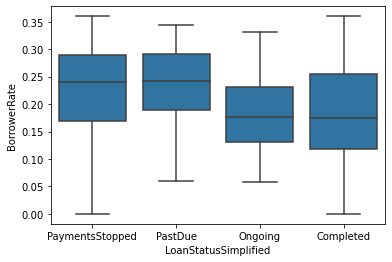

In [43]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='BorrowerRate', color=base_color);

We can notice that loan with stopped payments and the past due have a higher rate.

That could be explained by the fact that the higher the rate, the higher the price of the loan so borrower with hight rates have more chance to find themselves not able to pay anymore.

### Borrower Delinquencies Last 7 Years
Let's explore the relation of the loan statuses and the borrower number of delinquencies in the last 7 years with a violin plot.

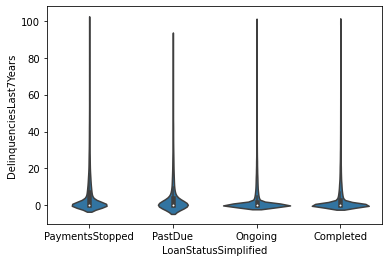

In [44]:
sb.violinplot(data=df_loan_data, x='LoanStatusSimplified', y='DelinquenciesLast7Years', color=base_color);

From those 2 plots, we cannot draw any conclusion about any relation between the number of deliquencies and the loan status.  
The fact that most of the borrowers don't have any delinquency gives to the violin the same shape for all the statuses.

### Is Borrower Homeowner
Let's explore the relation of the loan statuses and the fact that the borrower is a home owner or not with a clustered count plot.

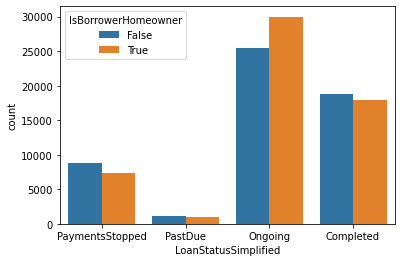

In [45]:
sb.countplot(data=df_loan_data, x='LoanStatusSimplified', hue='IsBorrowerHomeowner');

This clustered count plot shows us that there is almost no correlation between the loan statuses and the fact that the borrower is a home owner.

### Borrower Stated Monthly Income
Let's explore the relation of the loan statuses and the borrower stated monthly income with a box plot.

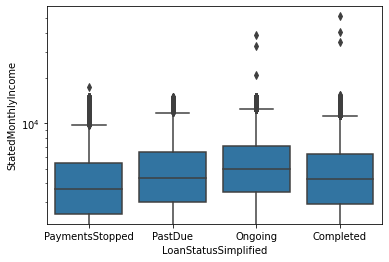

In [46]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='StatedMonthlyIncome', color=base_color);
plt.yscale('log');

This box plot shows us that the borrowers who stop their payment have in general less income than those who completed their loan.

### Loan Original Amount
Let's explore the relation of the loan statuses and the loan original amount with a box plot.

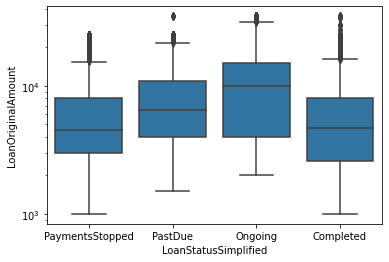

In [47]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='LoanOriginalAmount', color=base_color);
plt.yscale('log');

We cannot draw any conclusion from this box plot regarding the relation between the Loan Original amount and the loan status.

The 2 last variables don't have much influence on the loan status, but the debt to income ratio could have a higher influence on the loan status. Let's create this new variable

### Loan amount to Income Ratio

In [48]:
# Debt to income ration is the loan amount divided by the stated monthly income
#df_loan_data['Debt2IncomeRatio'] = df_loan_data.LoanOriginalAmount / df_loan_data.StatedMonthlyIncome
#df_loan_data.assign(Debt2IncomeRatio = lambda x: x.LoanOriginalAmount / x.StatedMonthlyIncome if x.StatedMonthlyIncome > 0 else 5)
max_loan_amount_2_income_ratio = 50.0
df_loan_data['LoanAmount2IncomeRatio'] = max_loan_amount_2_income_ratio
df_loan_data.loc[df_loan_data.StatedMonthlyIncome > 0, ['LoanAmount2IncomeRatio']] = df_loan_data.LoanOriginalAmount / df_loan_data.StatedMonthlyIncome
df_loan_data.loc[df_loan_data.LoanAmount2IncomeRatio > max_loan_amount_2_income_ratio, ['LoanAmount2IncomeRatio']] = max_loan_amount_2_income_ratio

df_loan_data.LoanAmount2IncomeRatio.describe([0.05, 0.5, 0.95])

count    110344.000000
mean          2.724559
std           6.296040
min           0.057600
5%            0.369231
50%           1.548387
95%           5.235260
max          50.000000
Name: LoanAmount2IncomeRatio, dtype: float64

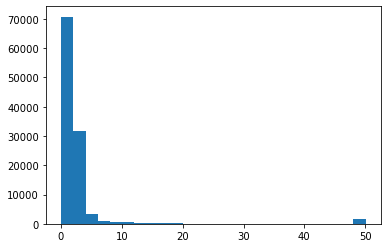

In [49]:
bin_step = 2
bins = np.arange(df_loan_data.LoanAmount2IncomeRatio.min(), df_loan_data.LoanAmount2IncomeRatio.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='LoanAmount2IncomeRatio', color=base_color, bins=bins);

We can notice that the debt to income ratio is very skewed to the right, and that we have a peak at the highest loan amount 2 income ratio I set. This limit is very high so they may be entries with eroneous data.

Let's explore the relation of the loan statuses and the loan amount to income ratio with a box plot.

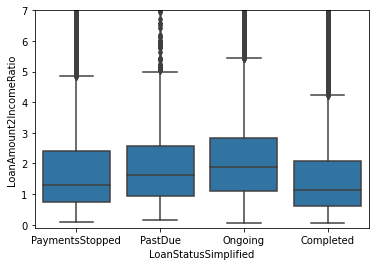

In [50]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='LoanAmount2IncomeRatio', color=base_color);
plt.ylim(-0.1, 7);

The box plot doesn't show us much more that what we concluded with the loan amount or the income.

### Borrower Credit Score Range Average
Let's explore the relation of the loan statuses and the credit average score with a box plot.

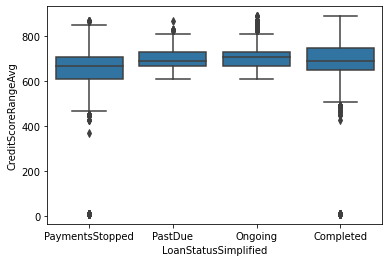

In [51]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='CreditScoreRangeAvg', color=base_color);

With this plot, we can see that the loan with stopped payments are the one from the Borrower with the lower Credit Score.

### Borrower occupation
Let's explore the relation of the loan statuses and the borrower occupation with a heatmap.

In [52]:
# Remove the entries with occupation other and professional because they don't bring important information and
# they will polute the heat map because they have much more entries than the other
df_loan_data_sub = df_loan_data[~df_loan_data.Occupation.isin(['Other', 'Professional'])]

# Group the data set by the 2 variable that interest us and store the size of the group in a new data frame
ct_counts = df_loan_data_sub.groupby(['LoanStatusSimplified', 'Occupation']).size()
# reset the index and rename it count
ct_counts = ct_counts.reset_index(name='count')
# Pivot the DF to have the Occupation as index and the count of the different Loan statuses as variable
ct_counts = ct_counts.pivot(index = 'Occupation', columns = 'LoanStatusSimplified', values = 'count')
ct_counts

LoanStatusSimplified,PaymentsStopped,PastDue,Ongoing,Completed
Occupation,,,,
Accountant/CPA,343,55,1681,1154
Administrative Assistant,676,79,1675,1257
Analyst,326,60,1765,1450
Architect,26,2,91,94
Attorney,49,9,604,384
...,...,...,...,...
Tradesman - Electrician,51,4,262,160
Tradesman - Mechanic,117,21,594,219
Tradesman - Plumber,20,0,52,30


At this point, we have a new data frame that represents the count of the different loan status for each given occupation

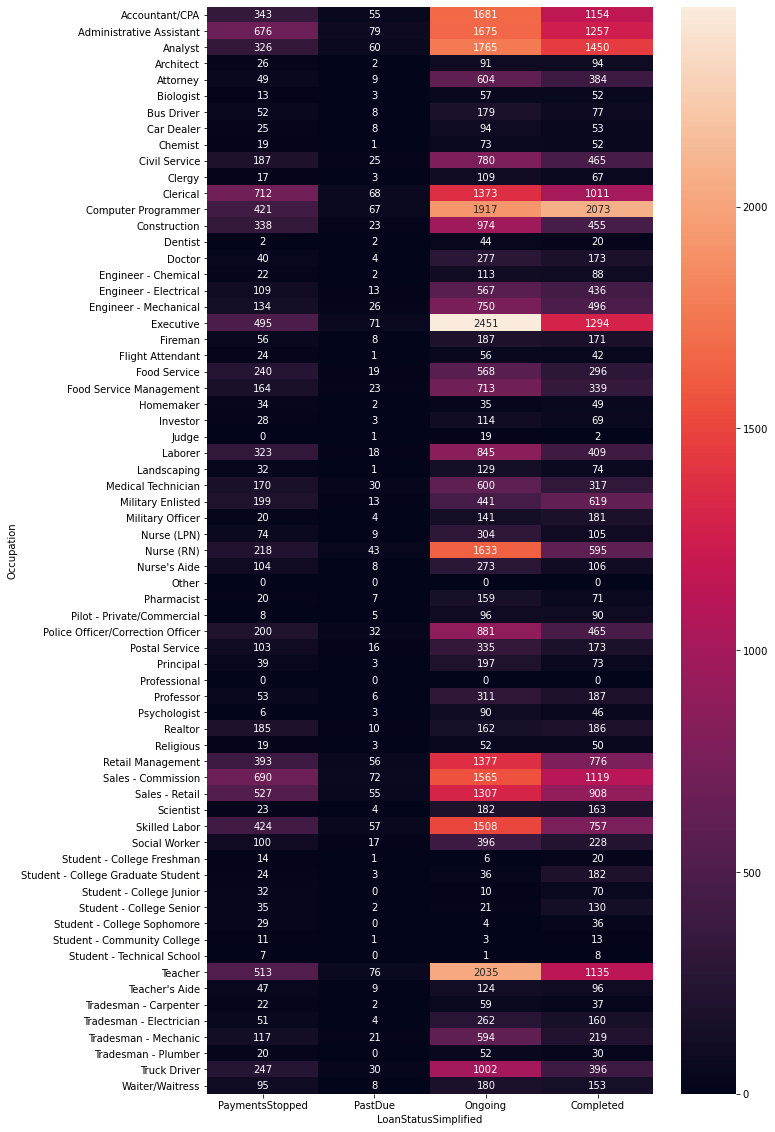

In [53]:
# Plot the previously transformed data frame into a heatmap
plt.figure(figsize=(10, 20))
sb.heatmap(ct_counts, annot = True, fmt = 'd');

By displaying the absolute count of different loan status for each occupation, we cannot draw any conclusion about which occupation has the highest chance to stop its loan payment because it depends on the total number of loan for each occupation.  
Let's use the ratio of the loan status for each occupation in the heatmap to compare the chances of the different loan status for each occupation.

In [54]:
# Retrieve the number of entries for each occupation
ct_counts_occ = df_loan_data.groupby(['Occupation']).size()
ct_counts_occ

Occupation
Accountant/CPA              3233
Administrative Assistant    3687
Analyst                     3601
Architect                    213
Attorney                    1046
                            ... 
Tradesman - Electrician      477
Tradesman - Mechanic         951
Tradesman - Plumber          102
Truck Driver                1675
Waiter/Waitress              436
Length: 67, dtype: int64

In [55]:
# Perform the same grouping than for the step above
# but work on the whole DF containing the Other and Professional occupation (with the ratio, they won't pollute anymore)
# and divide the count by the occupation total count to work with the ratio instead of the absolute count
ct_counts = df_loan_data.groupby(['Occupation', 'LoanStatusSimplified']).size() / ct_counts_occ
ct_counts = ct_counts.reset_index(name='ratio')
ct_counts = ct_counts.pivot(index = 'Occupation', columns = 'LoanStatusSimplified', values = 'ratio')

# Sort the DF based on the PaymentsStopped ratio
ct_counts = ct_counts.reindex(ct_counts.PaymentsStopped.sort_values().index, axis=0)

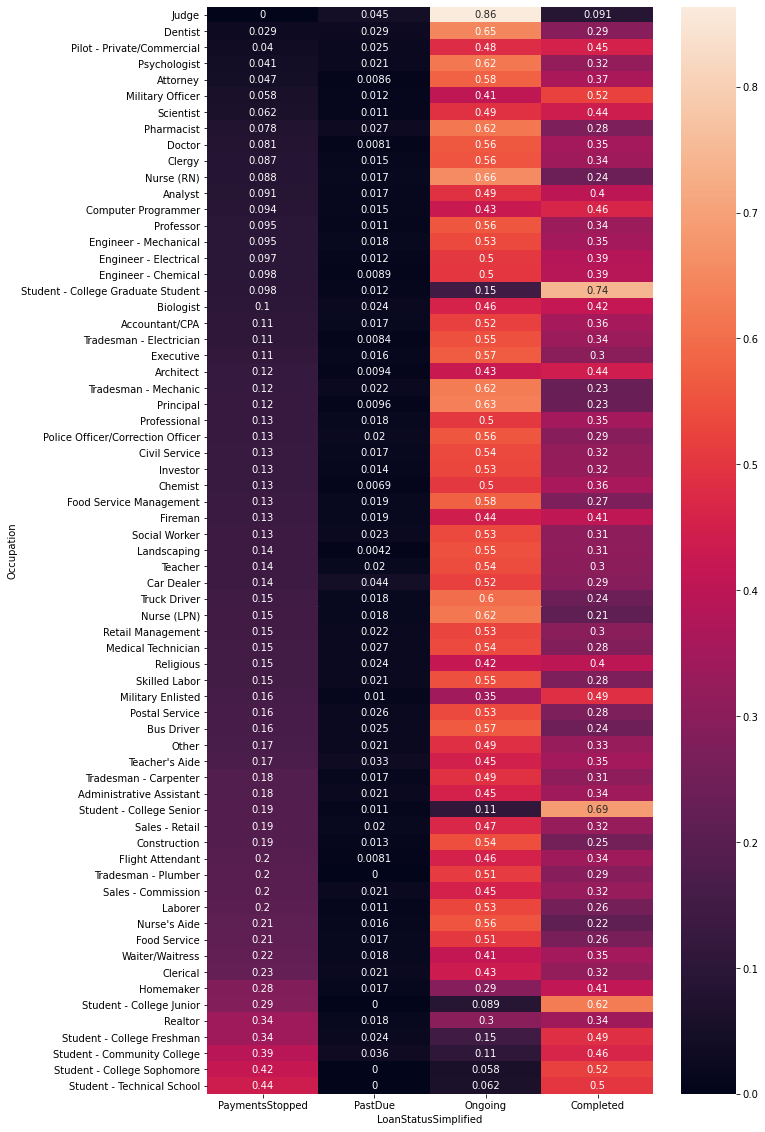

In [56]:
plt.figure(figsize=(10, 20))
sb.heatmap(ct_counts, annot = True);

From the sorted ratio heatmap, we can notice that the Students and the profession with lower wages (realtor, waiter...) have the highest payment stopped ratio and that the profession with the highest salaries (judge, dentist, pilot) have the lower payment stopped ratio.

I don't see any conclusion to draw about the other loan status w.r.t. to the occupation.

## Analysis of the influence of some variables on the Borrower rate
In this section, I will try to find the main variables that can have an impact of the borrower rate by using bivariate or multivariate analysis technics.

### Credit score range average
Let's explore the relation of the loan statuses and the credit average score with a scatter plot.

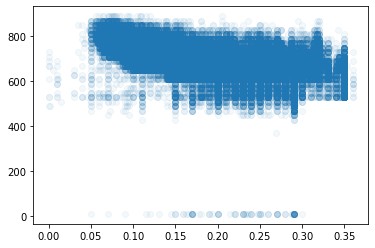

In [57]:
plt.scatter(data = df_loan_data, x = 'BorrowerRate', y = 'CreditScoreRangeAvg', alpha=1/20);

The scatter plot with some transparency shows us that there is a negative correlation between the Borrower Rate and his Credit score range average. This means that the higher the credit score, the lower the borrower rate.

### IsBorrowerHomeowner
Let's explore the relation of the borrower rate and the fact that the borrower is home owner or not with a box plot.

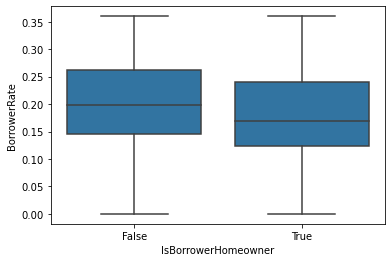

In [58]:
sb.boxplot(data=df_loan_data, x='IsBorrowerHomeowner', y='BorrowerRate', color=base_color);

This plot shows us that the borrowers who are home owners have more chance to have lower rates.

### Listing Category
Let's explore the relation of the borrower rate and the listing category with a bar plot.

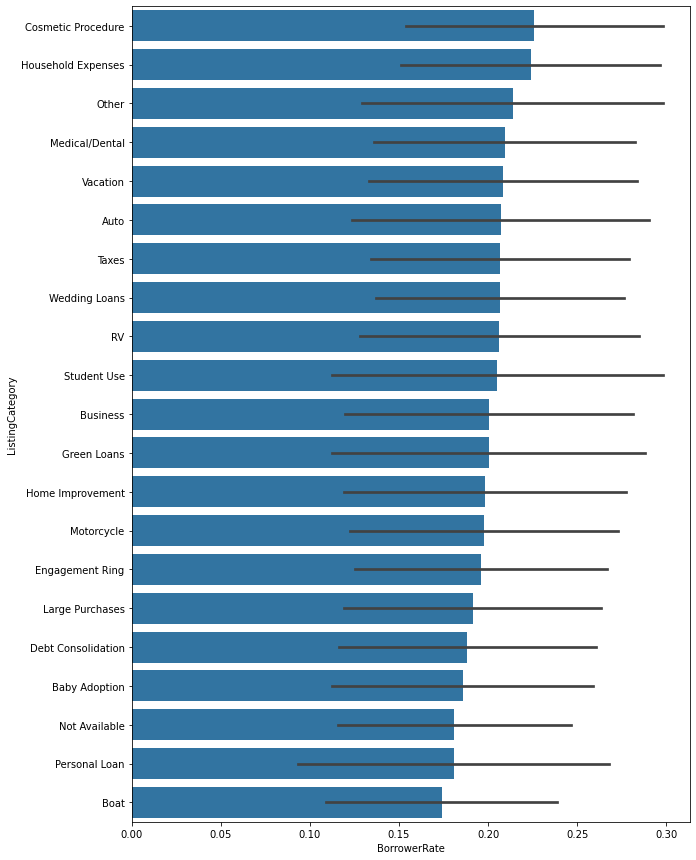

In [59]:
listing_order = df_loan_data.groupby(by=['ListingCategory']).BorrowerRate.mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 15))
sb.barplot(data=df_loan_data, x='BorrowerRate', y='ListingCategory', order=listing_order, color=base_color, ci='sd');

This bar plot shows us the listing category ordered by their associated borrower rate mean value. This shows us that taking a loan to buy a boat will allow you to have a lower rate than if the loan is for a cosmetic procedure.

### Recommendations
Let's explore the relation of the borrower rate and his Recommendations with a scatter plot.

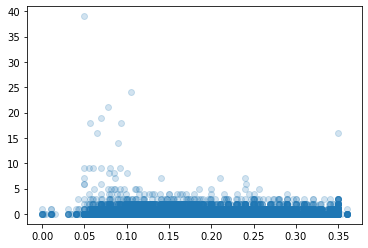

In [60]:
plt.scatter(data = df_loan_data, x = 'BorrowerRate', y = 'Recommendations', alpha=1/5);

Since most of the number of recommandation is near 0, it is impossible to detect a correlation between the borrower rates and his recommendations.

Let's try by simplifying the recommandations to a boolean

In [61]:
df_loan_data.loc[df_loan_data.Recommendations > 0, 'HasRecommendation'] = True
df_loan_data.loc[df_loan_data.Recommendations == 0, 'HasRecommendation'] = False
df_loan_data.HasRecommendation = df_loan_data.HasRecommendation.astype(bool)

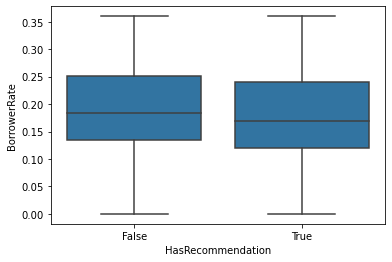

In [62]:
sb.boxplot(data=df_loan_data, x='HasRecommendation', y='BorrowerRate', color=base_color);

With the recommandation as boolean, we can notice that having some recommendations reduce the borrower rate

### Occupation
Let's explore the relation of the borrower rate and the loan original amount with a scatter plot.

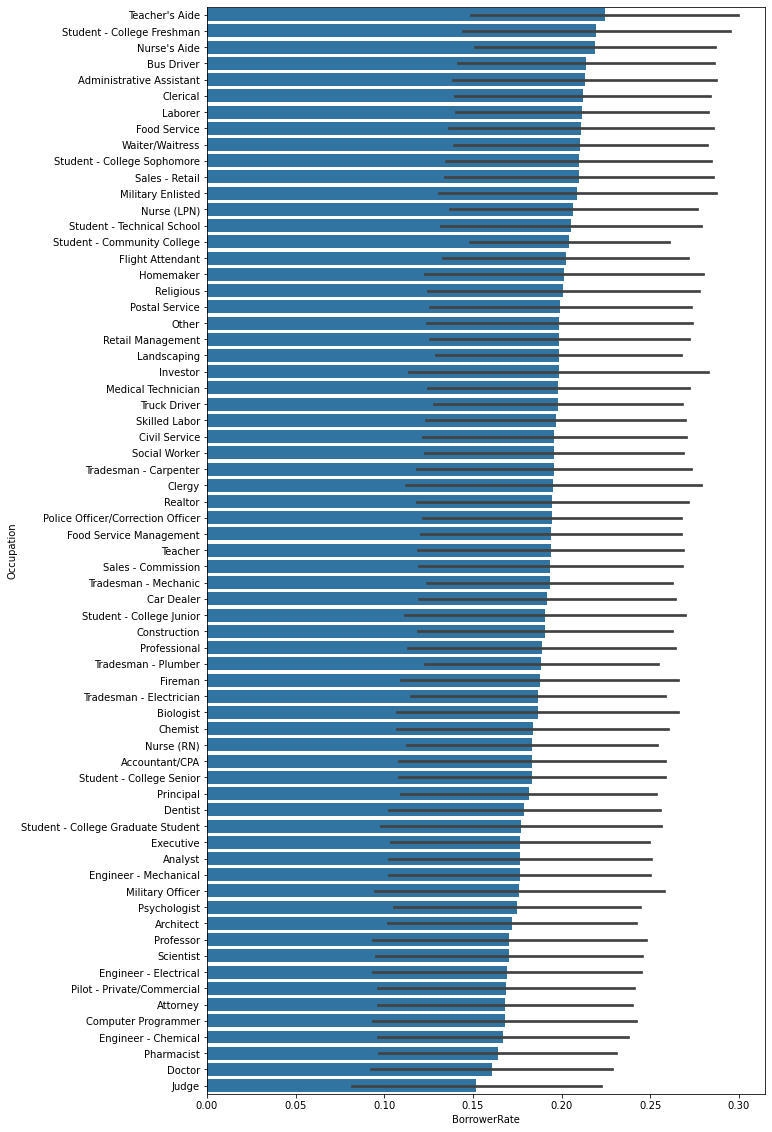

In [63]:
listing_order = df_loan_data.groupby(by=['Occupation']).BorrowerRate.mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 20))
sb.barplot(data=df_loan_data, x='BorrowerRate', y='Occupation', order=listing_order, color=base_color, ci='sd');

From this graph, we can observe that the occupation with the higher salaries (judge, doctor, attorney) have a higher chance to have lower borrower rate.

/home/simon/anaconda3/envs/data-analysis/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


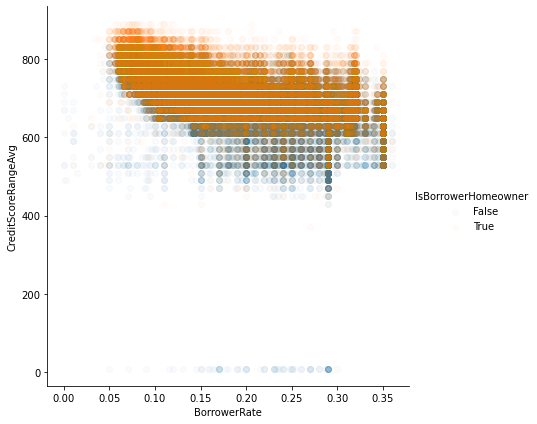

In [64]:
g = sb.FacetGrid(data = df_loan_data, hue = 'IsBorrowerHomeowner', size =6);
g.map(plt.scatter, 'BorrowerRate', 'CreditScoreRangeAvg', alpha=1/40);
g.add_legend();
#g.set(alpha=1/20);

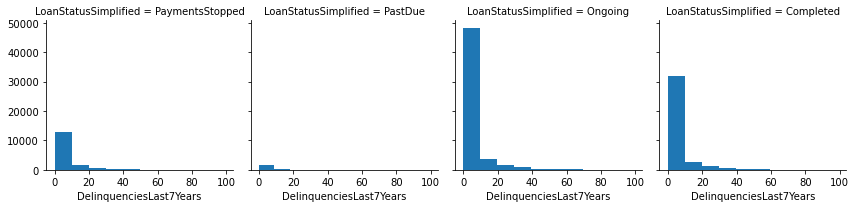

In [65]:
g = sb.FacetGrid(data = df_loan_data, col = 'LoanStatusSimplified');
g.map(plt.hist, "DelinquenciesLast7Years");